In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib notebook

In [2]:
samples=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200])


In [13]:
timesOptimised = []
errorsOptimised = []
timesNaive = []
errorsNaive = []
timesGtsam = []
errorsGtsam = []

for i in samples:
    #testOptimised
    df = pd.read_csv("./testOptimised/data"+str(i)+".csv")
    
    # Time
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesOptimised.append(sum(df["time"])/10**6)
    
    #Error
    se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
    errorsOptimised.append(sum(se)/len(se))
    
    #testNaive
    df = pd.read_csv("./testNaive/data"+str(i)+".csv")
    
    # Time
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesNaive.append(sum(df["time"])/10**6)
    
    #Error
    se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
    errorsNaive.append(sum(se)/len(se))
    
    #test Gtsam-style
    df = pd.read_csv("./testGtsam/data"+str(i)+".csv")
    
    # Time
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesGtsam.append(sum(df["time"])/10**6)
    
    #Error
    se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
    errorsGtsam.append(sum(se)/len(se))
    

<IPython.core.display.Javascript object>


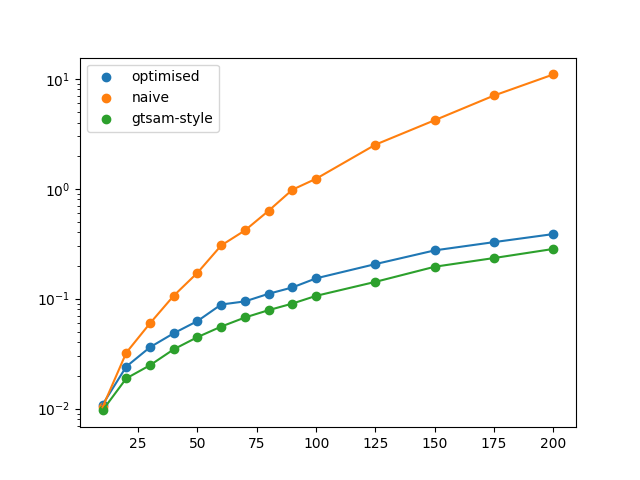

In [26]:
fig, ax = plt.subplots()

ax.scatter(samples, timesOptimised, label="optimised")
ax.plot(samples, timesOptimised, label="_optimised")
ax.scatter(samples, timesNaive, label="naive")
ax.plot(samples, timesNaive, label="_naive")
ax.scatter(samples, timesGtsam, label="gtsam-style")
ax.plot(samples, timesGtsam, label="_gtsam-style")

plt.yscale("log")
ax.legend()

plt.show()